In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


sns.set_style("whitegrid")



In [143]:
df = pd.read_csv('C:/Users/alaks/OneDrive/Documents/MLfiles/insurance.csv')

print(df)

      age     sex     bmi  children smoker     region      charges
0      18    male  23.210         0     no  southeast   1121.87390
1      18    male  30.140         0     no  southeast   1131.50660
2      18    male  33.330         0     no  southeast   1135.94070
3      18    male  33.660         0     no  southeast   1136.39940
4      18    male  34.100         0     no  southeast   1137.01100
...   ...     ...     ...       ...    ...        ...          ...
1333   33  female  35.530         0    yes  northwest  55135.40209
1334   31  female  38.095         1    yes  northeast  58571.07448
1335   52    male  34.485         3    yes  northwest  60021.39897
1336   45    male  30.360         0    yes  southeast  62592.87309
1337   54  female  47.410         0    yes  southeast  63770.42801

[1338 rows x 7 columns]


In [144]:
region = pd.get_dummies(df['region'],drop_first = False)
df = pd.concat([df,region],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   region     1338 non-null   object 
 6   charges    1338 non-null   float64
 7   northeast  1338 non-null   uint8  
 8   northwest  1338 non-null   uint8  
 9   southeast  1338 non-null   uint8  
 10  southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), object(3), uint8(4)
memory usage: 78.5+ KB


In [145]:
smoke = pd.get_dummies(df['smoker'],drop_first = True)
df = pd.concat([df,smoke],axis = 1)

In [146]:
df = df.rename(columns={'yes':'Smoker'})

In [147]:
sex = pd.get_dummies(df['sex'],drop_first = True)
df = pd.concat([df,sex],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   region     1338 non-null   object 
 6   charges    1338 non-null   float64
 7   northeast  1338 non-null   uint8  
 8   northwest  1338 non-null   uint8  
 9   southeast  1338 non-null   uint8  
 10  southwest  1338 non-null   uint8  
 11  Smoker     1338 non-null   uint8  
 12  male       1338 non-null   uint8  
dtypes: float64(2), int64(2), object(3), uint8(6)
memory usage: 81.1+ KB


In [148]:
df.head()


,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,Smoker,male
0,18,male,23.21,0,no,southeast,1121.8739,0,0,1,0,0,1
1,18,male,30.14,0,no,southeast,1131.5066,0,0,1,0,0,1
2,18,male,33.33,0,no,southeast,1135.9407,0,0,1,0,0,1
3,18,male,33.66,0,no,southeast,1136.3994,0,0,1,0,0,1
4,18,male,34.10,0,no,southeast,1137.0110,0,0,1,0,0,1


In [149]:
df = df.drop(['sex','smoker','region'], axis = 1)
df.head()


,age,bmi,children,charges,northeast,northwest,southeast,southwest,Smoker,male
0,18,23.21,0,1121.8739,0,0,1,0,0,1
1,18,30.14,0,1131.5066,0,0,1,0,0,1
2,18,33.33,0,1135.9407,0,0,1,0,0,1
3,18,33.66,0,1136.3994,0,0,1,0,0,1
4,18,34.10,0,1137.0110,0,0,1,0,0,1


In [150]:
#random forest regression
X = df.drop(['charges'],axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


R-squared score for Random Forest Regression on the test data: 0.862115247215941


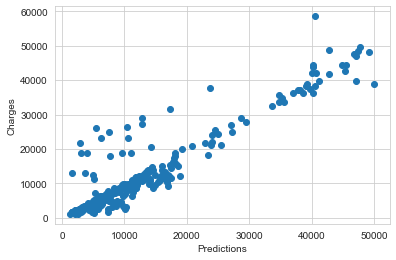

In [151]:
plt.scatter(predict,y_test)
plt.ylabel('Charges')
plt.xlabel('Predictions')

print('R-squared score for Random Forest Regression on the test data: {}'.format(r2_score(y_test, predict), 2))